In [ ]:
Solution1

In [6]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [3]:
def mean1(iris):
    return np.sum(iris)/len(iris)

In [ ]:
def st_dev(iris):

    return np.sqrt(np.sum((mat-means(iris))**2)/(len(iris)-1))

In [ ]:
def stan(iris):
    lst = []
    for i in range(len(iris)-1):
        lst.append(np.sum((iris[:,i],-means(iris[:,i])))/st_dev(iris[:,i])) 
    arr = np.array(lst)
    arr2 = np.transpose(arr)
    return arr2

In [ ]:
covariancee = (np.transpose(stan(iris))@stan(iris))*1/len(iris) 

In [ ]:
vals,vecs = np.linalg.eig(covariancee)


In [ ]:
pca = PCA(n_components=2)
X1 = pca.fit(X).transform(X)

In [ ]:
plt.figure()
colors = ['green', 'red', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X1[y == i, 0], X1[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

plt.show()

In [ ]:
X1 = pca.fit(X).transform(X)

In [ ]:
plt.figure()
colors = ['green', 'red', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X1[y == i, 0], X1[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

plt.show()

In [ ]:
Solution 2

In [29]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [33]:
import numpy as np


class MyPCA:
    def __init__(self, n_components):
        self.n_components = n_components

    def fit_transform(self, X):
       
        translated_X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
        e_values, e_vectors = np.linalg.eigh(np.cov(translated_X.T))

        e_ind_order = np.flip(e_values.argsort())
        e_values = e_values[e_ind_order]
        e_vectors = e_vectors[e_ind_order]

        principal_components = np.take(e_vectors, np.arange(self.n_components), axis=0)

        return np.matmul(translated_X, principal_components.T)

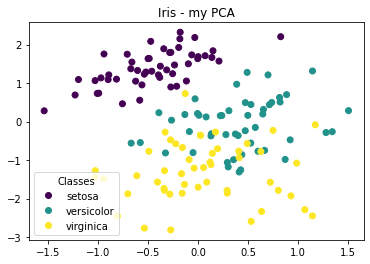

In [41]:
def plot_pca_results(pca_class, dataset, plot_title):
    X = dataset.data
    y = dataset.target
    y_names = dataset.target_names

    pca = pca_class(n_components=2)
    B = pca.fit_transform(X)
    B = np.concatenate([B, np.zeros_like(B)], 1)

    scatter = plt.scatter(B[:, 0], B[:, 1], c=y)
    scatter_objects, _ = scatter.legend_elements()
    plt.title(plot_title)
    plt.legend(scatter_objects, y_names, loc="lower left", title="Classes")
    plt.show()


dataset = datasets.load_iris()
plot_pca_results(MyPCA, dataset, "Iris - my PCA")